In [17]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import pandas as pd

### По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [3]:
F_H0 = stats.binom(100, 0.75)

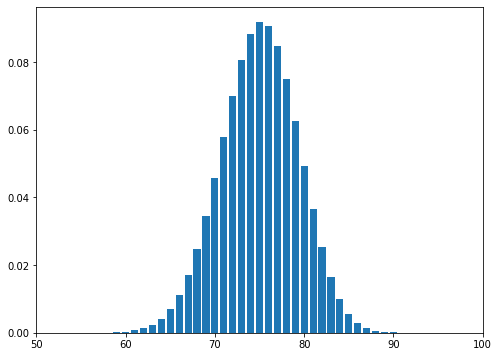

In [10]:
x = np.linspace(0,100,101)

plt.figure(figsize=(8,6))
plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(50, 100) 
plt.show()

In [14]:
print('достигаемый уровень значимости',round(stats.binom_test(67, 100, 0.75),4))

достигаемый уровень значимости 0.0822


### Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.



In [16]:
print('достигаемый уровень значимости',stats.binom_test(22, 55, 0.75))

достигаемый уровень значимости 3.988994790588596e-08


The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.


In [19]:
df = pd.read_table('pines.txt')
df.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


In [22]:
newdata = stats.binned_statistic_2d(df['sn'],df['we'],bins = [5,5],values=None, statistic='count')

In [27]:
trees_num = np.sum(newdata.statistic) / 25
print(trees_num)

23.36


In [32]:
round(stats.chisquare(newdata.statistic.flatten(), ddof = 0)[0],2)

150.59

Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с $25-1=24$ степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы $K-1$, где $K$ — количество интервалов).

Посчитайте достигаемый уровень значимости.

In [36]:
stats.chisquare(newdata.statistic.flatten(), ddof = 0)[1]

2.574669774967279e-20